<a href="https://colab.research.google.com/github/disuja7/ML-Hub/blob/Loan_Prediction/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Loan Prediction**

## **Problem statement**

In finance, loan approval is a crucial and important task to be performed before providing loan to any person. This insures that the loan approved can be recovered in future. However to identify a person is a good fit for the loan or a defaulter, it becomes very hard to identify the characters and features that will help to decide the same.

Loan prediction model using Machine Learning becomes very usefull tool in these situation to predict the person is defaulter or not based on the past data.

We have been given two datasets(train and test) containing the past transactions which includes some of the features of customers and a label which shows the customer was defaulter or not. We have built a model which can perform on train dataset and can identify the defaulters as accurately as possible on the test dataset.

### **About Data:**

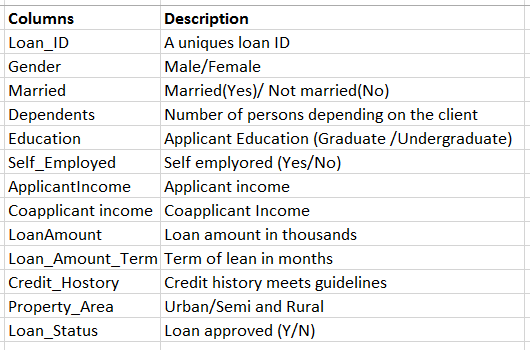

# **Importing Libraries and Loading dataset**

In [39]:
#Impoting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df_train = pd.read_csv("/content/train_u6lujuX_CVtuZ9i.csv")
df_test = pd.read_csv("/content/test_Y3wMUE5_7gLdaTN.csv")

In [41]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [43]:
#shape of data
df_train.shape

(614, 13)

In [44]:
#data summary
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#**Data cleaning**

In [46]:
#checking for any null values
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

So we have a lot of null values, having maximum of 50 for Credit_History.

**Dropping all the null values**

In [47]:
# Dropping all the null values
drop_list = ['Gender','Married','Dependents','Self_Employed','LoanAmount','Loan_Amount_Term','Credit_History']
for col in drop_list:
 df_train = df_train[~df_train[col].isna()]

In [48]:
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we have dropped all the null values.

Since the column Loan_ID is of no use, we will drop this.

In [49]:
# dropping Loan_ID
df_train.drop(columns='Loan_ID',axis=1, inplace=True)

In [50]:
df_train.shape

(480, 12)

In [51]:
#data summary
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


# **Exploratory Data Analysis (EDA)**

In [52]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


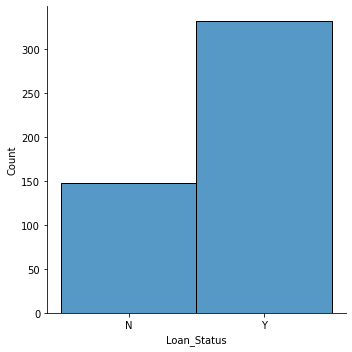

In [53]:
#distribution of Churn data
sns.displot(data=df_train,x='Loan_Status')

So we have a data which is unbalanced but not too much.

### **Distribution of independent categorical variables with respect to dependent variable.**

In [54]:
#Defining categorical features
categorical_features=list(df_train.columns)
numeical_features = list(df_train.describe().columns)
for elem in numeical_features:
 categorical_features.remove(elem)
categorical_features = categorical_features[:-1]
categorical_features

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

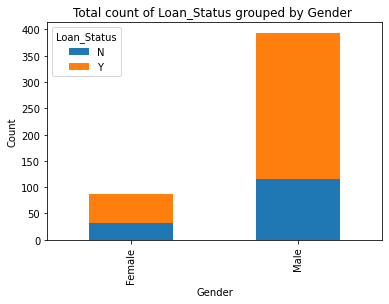

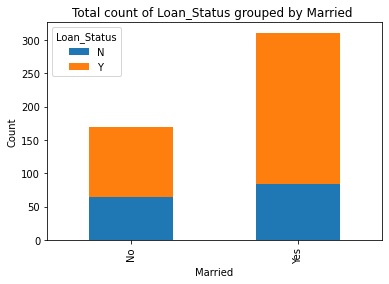

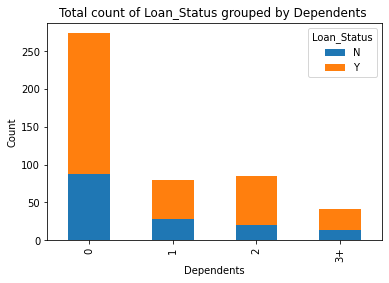

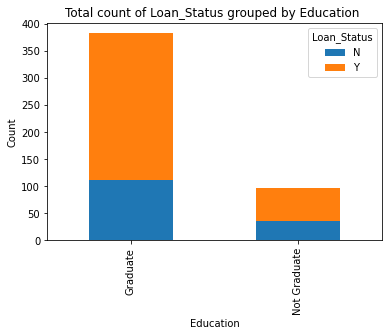

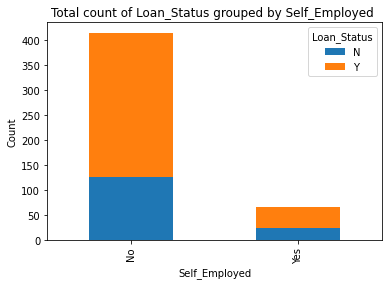

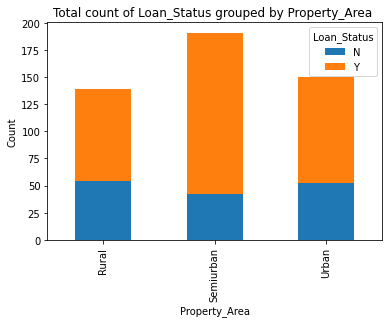

In [55]:
for col in categorical_features:
  df_train.groupby([col, 'Loan_Status']).size().unstack().plot(kind='bar', stacked=True)
  plt.title(f'Total count of Loan_Status grouped by {col} ')
  plt.ylabel('Count')
  plt.show()

**Observations from above plots:**



*   Male is having greater percentage of loan approved as compared to feamle.
*   Loan approval is more favoured towards graduates compared to non-graduates.

*   Self employed are having a less chance to get loan approved compared to apmployed.
*   Semi-urban area has the highest loan appproval rate.




## **Let's have a look on the continuous independent variables grouped by dependent variable**

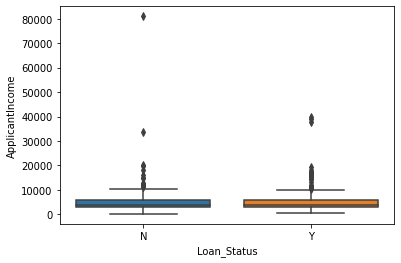

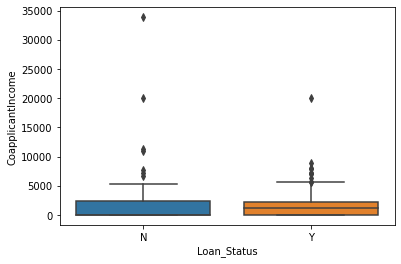

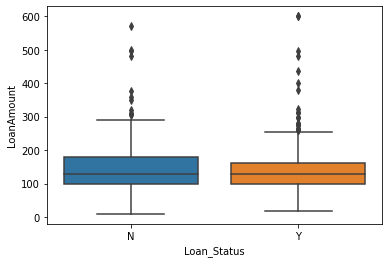

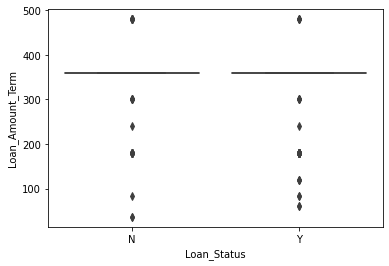

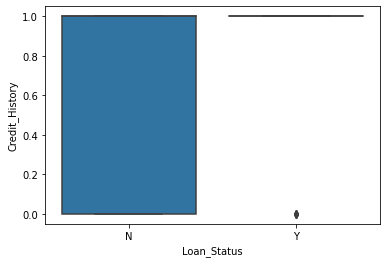

In [56]:
for col in df_train.describe().columns:
  sns.boxplot(x='Loan_Status', y=col, data=df_train)
  plt.show()

We can observe a lot of outliers in the data.

No any proper conclusions can be made from the box plots above.

## **Correlation**

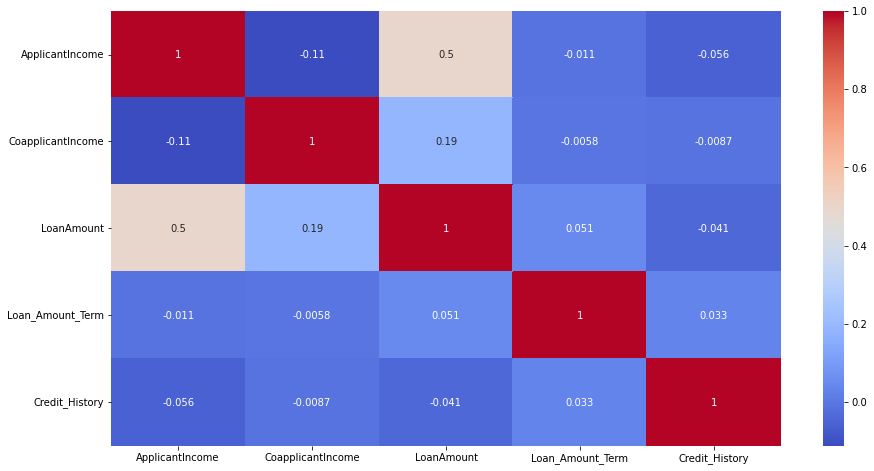

In [57]:
 ## Correlation between variables
plt.figure(figsize=(15,8))
correlation = df_train.corr()
sns.heatmap((correlation), annot=True, cmap='coolwarm')

No any significant correlation observed.

## **Data Preprocessing**

In [61]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [62]:
df_train['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [63]:
df_train['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [64]:
df_train['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

**Converting categorical column to numeric using label encoding**

In [69]:
#Label encoding for some categorical features
df_train_new = df_train.copy()
label_col_list = ['Married','Self_Employed']
for col in label_col_list:
  df_train_new=df_train_new.replace({col:{'Yes':1,'No':0}})

In [70]:
df_train_new=df_train_new.replace({'Gender':{'Male':1,'Female':0}})
df_train_new=df_train_new.replace({'Education':{'Graduate':1,'Not Graduate':0}})
df_train_new=df_train_new.replace({'Loan_Status':{'Y':1,'N':0}})

**For the rest of categorical feature we will do one hot encoding:**

In [72]:
#one hot encoding
df_train_new = pd.get_dummies(df_train_new, columns=["Dependents","Property_Area"])

In [73]:
df_train_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,0,1


**Stanardizing the continuous variables.**

In [74]:
#standardize continuous features
from scipy.stats import zscore
df_train_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]=df_train_new[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']].apply(zscore) 

In [75]:
df_train_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,1,1,0,0,0,0,0,1
5,1,1,1,1,0.009319,0.999978,1.520245,0.275542,1.0,1,0,0,1,0,0,0,1


In [76]:
# Repositioning the dependent variable to last index
last_column = df_train_new.pop('Loan_Status')
df_train_new.insert(16, 'Loan_Status', last_column)
df_train_new.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
1,1,1,1,0,-0.137970,-0.027952,-0.208089,0.275542,1.0,0,1,0,0,1,0,0,0
2,1,1,1,1,-0.417536,-0.604633,-0.979001,0.275542,1.0,1,0,0,0,0,0,1,1
3,1,1,0,0,-0.491180,0.297100,-0.307562,0.275542,1.0,1,0,0,0,0,0,1,1
4,1,0,1,0,0.112280,-0.604633,-0.046446,0.275542,1.0,1,0,0,0,0,0,1,1
5,1,1,1,1,0.009319,0.999978,1.520245,0.275542,1.0,0,0,1,0,0,0,1,1


**Now our data is proceesed for modeling**

### **Train test split**

Since our data is only for train and another data available for testing.
We will still go with train test split as the testing data is not labled and it is neccessary to evaluate the model on unseen data.

In [77]:
X= df_train_new.iloc[:,:-1]
y= df_train_new.iloc[:,-1]
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(384, 16)
(96, 16)


In [78]:
y_train.value_counts()

1    271
0    113
Name: Loan_Status, dtype: int64

In [79]:
y_test.value_counts()

1    61
0    35
Name: Loan_Status, dtype: int64

## <b>Fitting logistic regression on train data

In [80]:
#Importing and fitting Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=True, max_iter=10000,random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [81]:
# Get the model coefficients
lr.coef_

array([[ 0.23272114,  0.57128602,  0.26384918, -0.24617035,  0.15924191,
        -0.14703758, -0.19280038, -0.16392914,  2.97399665, -0.18202629,
        -0.27741114,  0.17256535,  0.28601466, -0.30275813,  0.64592912,
        -0.3440284 ]])

In [82]:
#model intercept
lr.intercept_

array([-2.1943974])

## <b>Evaluating the performance of the trained model

In [83]:
# Get the predicted probabilities
train_preds = lr.predict_proba(X_train)
test_preds = lr.predict_proba(X_test)

In [84]:
test_preds

array([[0.23916396, 0.76083604],
       [0.24506751, 0.75493249],
       [0.04933527, 0.95066473],
       [0.20146124, 0.79853876],
       [0.2347122 , 0.7652878 ],
       [0.05817427, 0.94182573],
       [0.17668886, 0.82331114],
       [0.21352909, 0.78647091],
       [0.39015173, 0.60984827],
       [0.1902079 , 0.8097921 ],
       [0.20590091, 0.79409909],
       [0.184445  , 0.815555  ],
       [0.80677694, 0.19322306],
       [0.23024539, 0.76975461],
       [0.23674387, 0.76325613],
       [0.32409412, 0.67590588],
       [0.08612609, 0.91387391],
       [0.20502754, 0.79497246],
       [0.71006169, 0.28993831],
       [0.05818474, 0.94181526],
       [0.16546532, 0.83453468],
       [0.1191243 , 0.8808757 ],
       [0.16412334, 0.83587666],
       [0.14471253, 0.85528747],
       [0.49082632, 0.50917368],
       [0.37484189, 0.62515811],
       [0.20042593, 0.79957407],
       [0.07289182, 0.92710818],
       [0.10696878, 0.89303122],
       [0.27313905, 0.72686095],
       [0.

In [86]:
# Get the predicted classes
train_class_preds = lr.predict(X_train)
test_class_preds = lr.predict(X_test)

In [87]:
train_class_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,

### **Accuracy Score**

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.8229166666666666
The accuracy on test data is  0.7604166666666666


In [89]:
# Other evaluation metrics for train data
print(classification_report(train_class_preds,y_train))

              precision    recall  f1-score   support

           0       0.45      0.89      0.60        57
           1       0.98      0.81      0.89       327

    accuracy                           0.82       384
   macro avg       0.71      0.85      0.74       384
weighted avg       0.90      0.82      0.84       384



In [90]:
# Other evaluation metrics for train data
print(classification_report(y_test,test_class_preds))

              precision    recall  f1-score   support

           0       1.00      0.34      0.51        35
           1       0.73      1.00      0.84        61

    accuracy                           0.76        96
   macro avg       0.86      0.67      0.68        96
weighted avg       0.83      0.76      0.72        96



### **Confusion Matrix on trained data**

[[ 51  62]
 [  6 265]]


[Text(0, 0.5, 'approved'), Text(0, 1.5, 'Notapproved')]

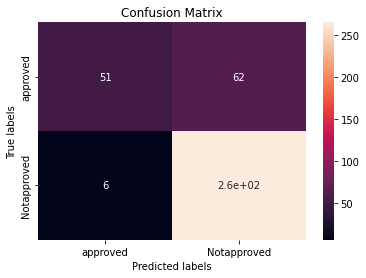

In [92]:
# Get the confusion matrix for trained data

labels = ['approved', 'Notapproved']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### **Confusion Matrix on test data**

[[12 23]
 [ 0 61]]


[Text(0, 0.5, 'approved'), Text(0, 1.5, 'Notapproved')]

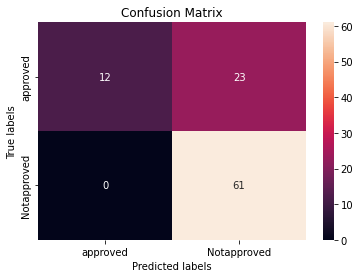

In [94]:
# Get the confusion matrix for test data

labels = ['approved', 'Notapproved']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)